# Cluster Analysis in Python

It's the 5th course in [DataCamp Machine Learning in Python Track](https://learn.datacamp.com/career-tracks/machine-learning-scientist-with-python?version=1). Shaumik Daityari is the instructor. He is Business Analyst at American Express

the first part of this notebook contains the main Algorithms I learned from [the course](https://learn.datacamp.com/courses/cluster-analysis-in-python).  The second is how I implemented these algorithms into Iris, Wine,  Company Stock Price Movements Dataset
 
## Part 1: Main Algorithms
### Ch1. Introduction to Clustering

### Ch2. Hierarchical Clustering
##### Hyperparameter: method <br>
&emsp; - single: min distance between the samples <br>
&emsp; - complete: max distance between the samples <br>
&emsp; - average: average arithmetic distance between the samples <br>
&emsp; - centroid: average geometric distance between the samples <br>
&emsp; - ward: based on the sum of squares <br>
&emsp; - median: based on the median of all samples <br>

##### disadvantages
1. Quadradic increase in time

### Ch3. K-Means Clustering
##### Steps 
1. Randomly select ‘c’ cluster centers.
2. calculate the distance between each data point and cluster centers.
3. Assign the data point to the cluster center whose distance from the cluster center is minimum of all the cluster centers..
4. Recalculate the new cluster center

##### Advantages 
1. Fast
2. best results when the dataset is well separable

##### Disadvantages
1. it requires apriori specification of the number of  cluster centers.
2. Changing the way of measuring the distance changes the results 
3. fails with non-linear datasets

### Ch4. Clustering in Real World
1. image clustering
2. document clustering

## Part 2: Real-world Datasets
#### import libraries


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib notebook
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

### Education Indicators 2014 Dataset
- **Algorithms**: linkage, fcluster "hierarchical clustering"
- **Visualization**: <br>
&emsp; Fig1: TSNE for all data  <br>
&emsp; Fig2: TSNE for all data colored by ward clustering  <br> 
&emsp; Fig3: TSNE for all data colored by complete clustering  <br>
&emsp; Fig4: TSNE for all data colored by single clustering  <br> 
&emsp; Fig5: TSNE for all data colored by centroid clustering  <br> 

- **Evaluation**: 
- **Conclusion**: for this dataset, distance as 'ward' is the best choice


<IPython.core.display.Javascript object>


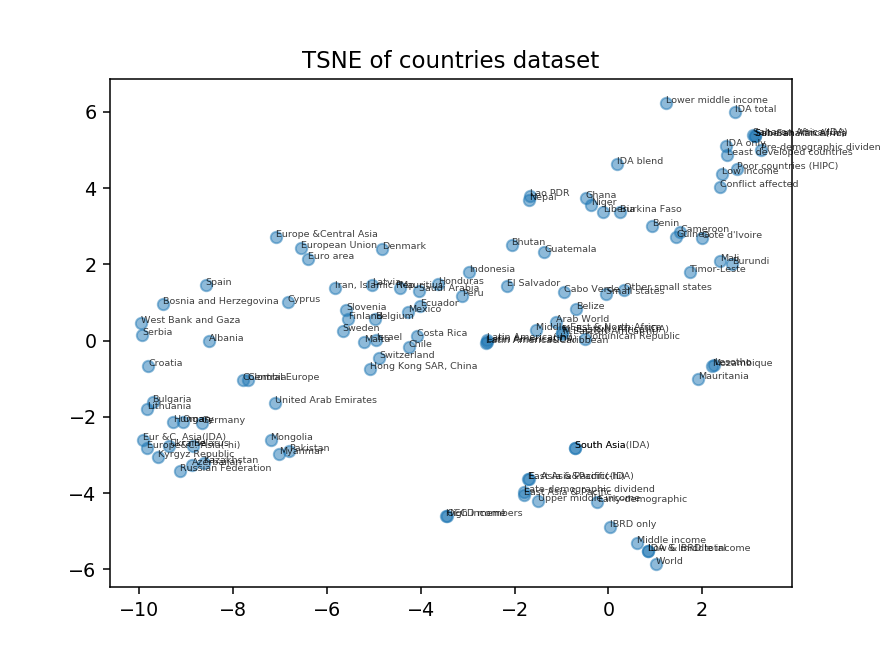

In [2]:
countries = pd.read_csv("Datasets/Education Indicators 2014.csv", index_col = 0)
countries_name = countries.index
countries.head() # there are huge difference in measurements

#standarization
scaler = StandardScaler().fit(countries)
scaled_countries = scaler.transform(countries)
scaled_countries 

# TSNE plot
tsne = TSNE(learning_rate = 50)
tsne_countries = tsne.fit_transform(scaled_countries)
fig1, ax1 = plt.subplots()
plt.scatter(tsne_countries[:, 0], tsne_countries[:, 1], alpha = 0.5)
for d, country in zip(tsne_countries, countries_name):
    plt.annotate(country, (d[0], d[1]), fontsize=5, alpha=0.75)
plt.gca().set_title('TSNE of countries dataset')




labels = pd.DataFrame()

In [3]:
def cluster_with_TSNE(method):
    model = linkage(scaled_countries, method = method)    
    labels[method] = fcluster(model, 5, criterion = 'maxclust')

    # TSNE plot
    tsne = TSNE(learning_rate = 50)
    tsne_countries = tsne.fit_transform(scaled_countries)
    fig2, ax2 = plt.subplots()
    plt.scatter(tsne_countries[:, 0], tsne_countries[:, 1], c= labels[method], alpha = 0.7)
    for d, country in zip(tsne_countries, countries_name):
        plt.annotate(country, (d[0], d[1]), fontsize=5, alpha=0.75)
    plt.gca().set_title(method)


<IPython.core.display.Javascript object>


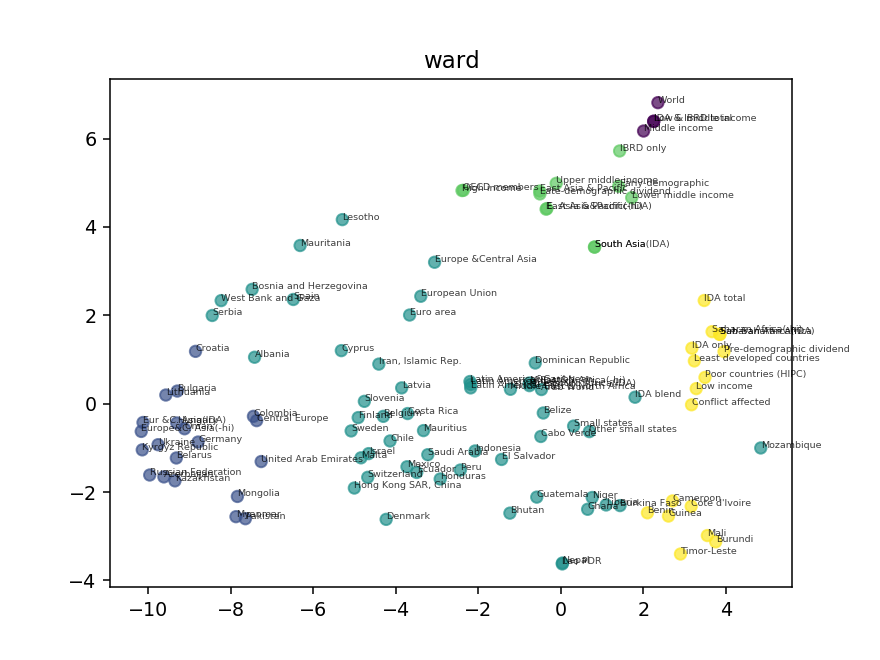

In [4]:
cluster_with_TSNE('ward')

<IPython.core.display.Javascript object>


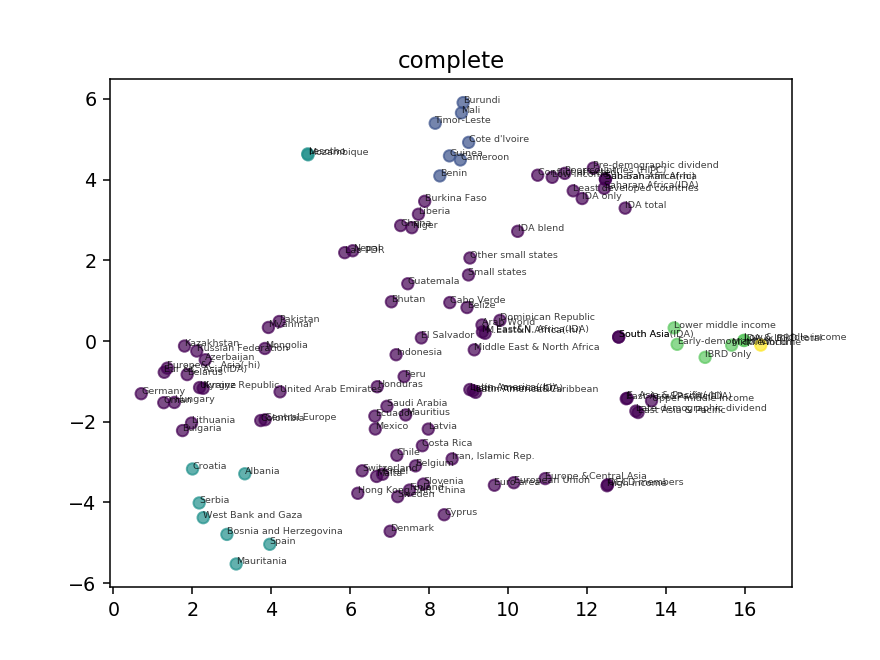

In [5]:
cluster_with_TSNE('complete')

<IPython.core.display.Javascript object>


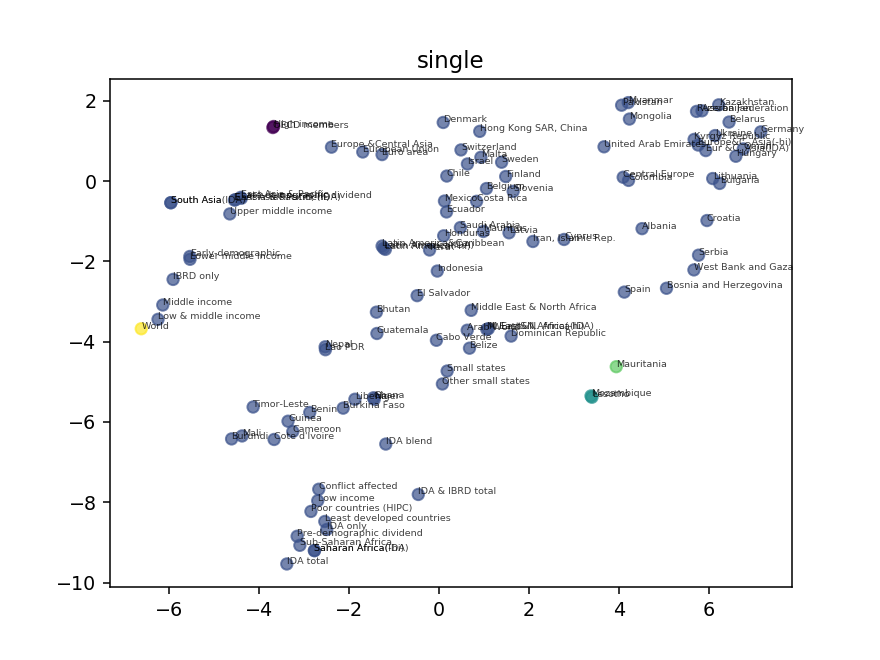

In [6]:
cluster_with_TSNE('single')

<IPython.core.display.Javascript object>


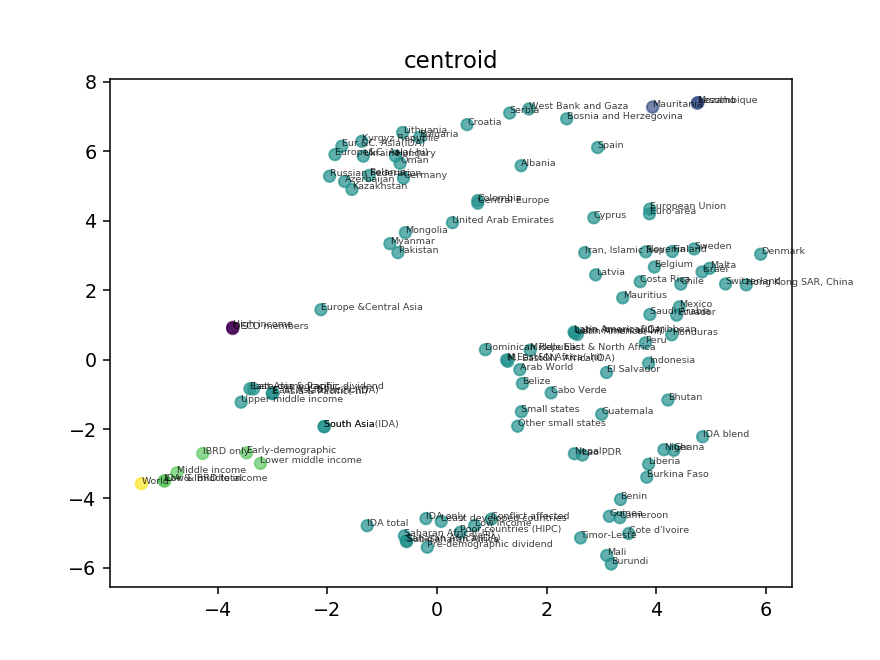

In [7]:
cluster_with_TSNE('centroid')

In [8]:
for c in labels.columns:
    print(labels[c].value_counts())

3    54
2    20
5    17
4    12
1     4
Name: ward, dtype: int64
1    84
3     9
2     7
4     6
5     1
Name: complete, dtype: int64
2    101
3      2
1      2
5      1
4      1
Name: single, dtype: int64
3    95
4     6
2     3
1     2
5     1
Name: centroid, dtype: int64
